<b> Example of gammapy calculations </b>

In [1]:
# Import libaries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from gammapy import gammapy
from IPython.display import display
import time

In [2]:
# Import dataset 
data = np.loadtxt("Ferro 3D.dat", skiprows= 1, unpack=False)
df = pd.DataFrame(data, columns=['X','Y','Z','fe'])
display(df.head(8))

,X,Y,Z,fe
0,1080.0,1027.9,506.2,51.1
1,1080.0,1021.1,494.5,51.1
2,1614.0,1030.7,375.0,45.1
3,1614.0,1023.2,362.1,45.1
4,1614.0,1005.3,331.1,41.5
5,1513.0,1043.5,395.4,41.1
6,1513.0,1036.0,382.4,41.1
7,1513.0,1019.9,354.5,45.9


In [3]:
# Create python object containing all experimental values 

nlags = 10
lagdistance= 80
lineartolerance = 40
htolerance = 45.0
vtolerance = 45.0
hband = 40
vband = 40 
vband = 40
azimuth = 45
dip = 0

gamma = gammapy.funcs_3D(df,'X','Y','Z','fe','fe',nlags,lagdistance,
                         lineartolerance, htolerance, vtolerance, 
                         hband, vband, azimuth,dip)

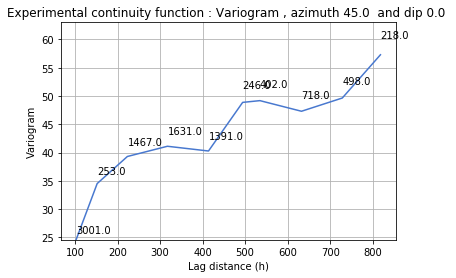

11.343698740005493


In [5]:
# Calculate variogram values 
start = time.time()
variogram = gamma.calculate_experimental_function("Variogram", plot_graph = True, show_pairs = True)
finish = time.time()
print(finish -start)

In [6]:
display(variogram)

,Spatial continuity,Number of pairs,Average distance
0,24.573319,3001.0,102.560075
1,34.513182,253.0,152.152359
2,39.300774,1467.0,223.186799
3,41.107452,1631.0,317.355296
4,40.270464,1391.0,413.938926
5,48.864878,246.0,494.268885
6,49.173781,402.0,534.847197
7,47.296128,718.0,632.596105
8,49.638163,498.0,728.568815
9,57.282500,218.0,818.277750


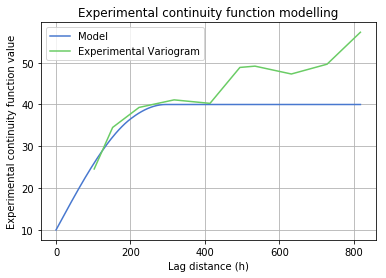

,distances,model
0,0.000000,10.000000
1,4.111948,10.676848
2,8.223897,11.353362
3,12.335845,12.029210
4,16.447794,12.704056
5,20.559742,13.377570
6,24.671691,14.049415
7,28.783639,14.719260
8,32.895588,15.386771
9,37.007536,16.051613


In [15]:
# Modelling experimental variogram
gamma.modelling(experimental_dataframe = variogram, 
                rotation_reference = [45,0,0],
                model_func = ["Spherical", "Spherical"],
                ranges =[[200,50,50],[295,50,50]],
                contribution = [5,25],
                nugget = 10,
                inverted = False)

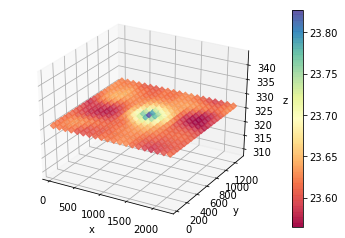

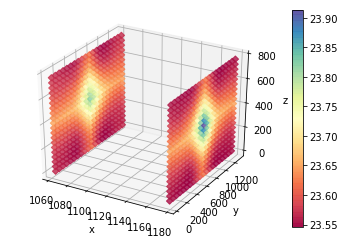

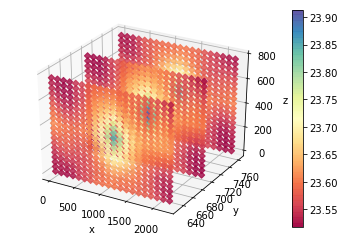

In [7]:
# Calculate average covariogram maps in three dimensions 
gamma.covariogram_map_3d('fe',5,division=20, cutz=[300,350], alpha=0.8)
gamma.covariogram_map_3d('fe',5,division=20, cutx=[1000,1200], alpha=0.8)
gamma.covariogram_map_3d('fe',5,division=20, cuty=[600,800], alpha=0.8)
